a : 0
b : 5
       k          prob    cumsum
0    0.0  5.631351e-02  0.056314
1    1.0  1.877117e-01  0.244025
2    2.0  2.815676e-01  0.525593
3    3.0  2.502823e-01  0.775875
4    4.0  1.459980e-01  0.921873
5    5.0  5.839920e-02  0.980272
6    6.0  1.622200e-02  0.996494
7    7.0  3.089905e-03  0.999584
8    8.0  3.862381e-04  0.999970
9    9.0  2.861023e-05  0.999999
10  10.0  9.536743e-07  1.000000


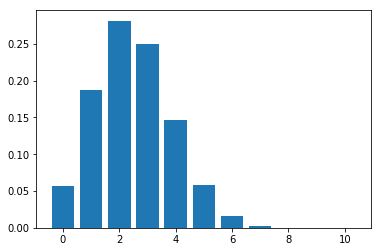

In [3]:
import pandas as pd
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

def binomial_distribution(n, p,):
    """ Display the binomial distribution depending on the parameters n and p.
        Display a dataframe and a bar chart.
        Display the minimum and the maximum value of the confidence interval (0.025 / 0.975)
    """
    df = pd.DataFrame(columns=['k', 'prob', 'cumsum'])

    cumsum = 0
    a = {}
    b = {}
    a['search'] = True
    a['value'] = 0
    b['search'] = True
    b['value'] = 0

    for k in range(0,n+1):
        binom = scipy.special.binom(n, k)
        prob = binom * p**k * (1-p)**(n-k)
        cumsum += prob

        df = df.append({'k':k, 'prob':prob, 'cumsum':cumsum}, ignore_index=True)

        if cumsum > 0.025 and a['search']:
            a['value'] = k
            a['search'] = False

        if cumsum >= 0.975 and b['search']:
            b['value'] = k
            b['search'] = False

    print("a : {}".format(a['value']))
    print("b : {}".format(b['value']))
    print(df)
    plot = plt.bar(df['k'], df['prob'])

# Example
binomial_distribution(10,0.25)